# Benchmark Analysis

## Setup and Imports

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

#reload every time
%load_ext autoreload
%autoreload 2

from benchmark_analyzer import BenchmarkAnalyzer


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load Results Directory and Initialize Analyzer

In [92]:
# results_dir = Path("../benchmarking/results/keepers/all-all-gpt5")  # Example path, replace with actual path
# results_dir = Path("../benchmarking/results/keepers/solo-all-gpt5")  # Example path, replace with actual path
results_dir = Path("../benchmarking/results/keepers/_minisAndNanos/orchestrators_hello-world_gpt5nano")  # Example path, replace with actual path
# results_dir = Path("../benchmarking/results/keepers/all-smallAndLarge-gpt5")  # Example path, replace with actual path

if not results_dir.exists():
    raise ValueError(f"Results directory not found: {results_dir}")

data_dir = Path("data")
BenchmarkAnalyzer.generate_all_data_files(results_dir, data_dir)

## Score Visualizations

Generated data for 80 results


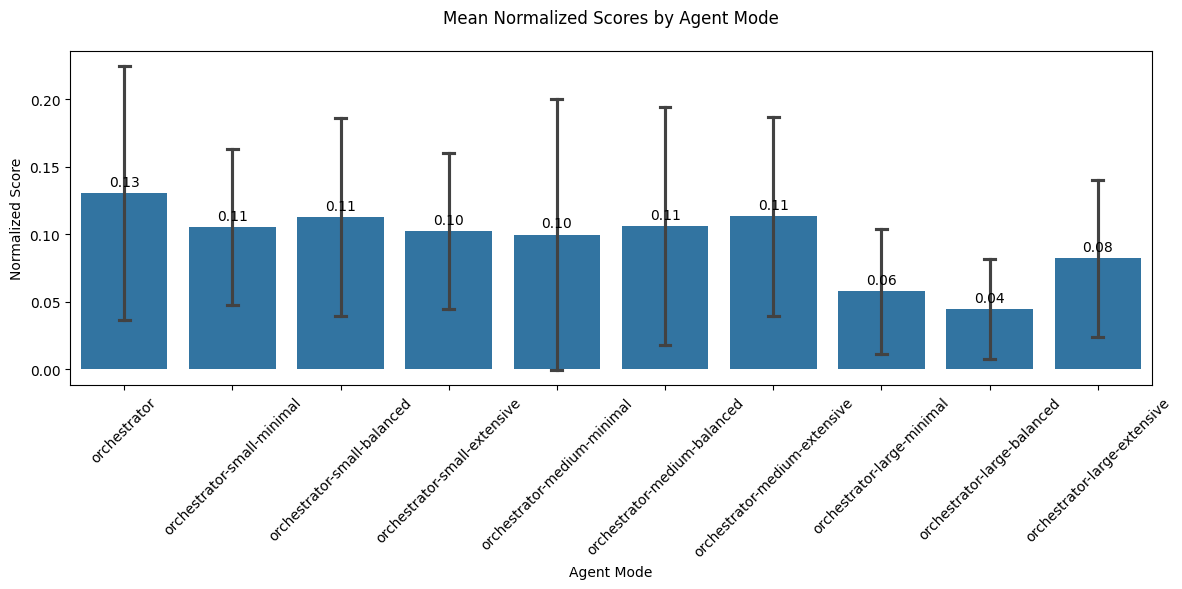

In [113]:

df = pd.read_csv("data/benchmark_results.csv")
print(f"Generated data for {len(df)} results")

plt.figure(figsize=(12, 6))

# Create bar plot of mean scores
ax = sns.barplot(data=df, x='agent_mode', y='normalized_score', 
                errorbar='sd', capsize=0.1)

# Customize the plot
plt.title('Mean Normalized Scores by Agent Mode', pad=20)
plt.xlabel('Agent Mode')
plt.ylabel('Normalized Score')
plt.xticks(rotation=45)

# Add value labels on top of bars
for i in ax.containers:
    ax.bar_label(i, fmt='%.2f', padding=3)

plt.tight_layout()
plt.show()


Generated data for 80 results


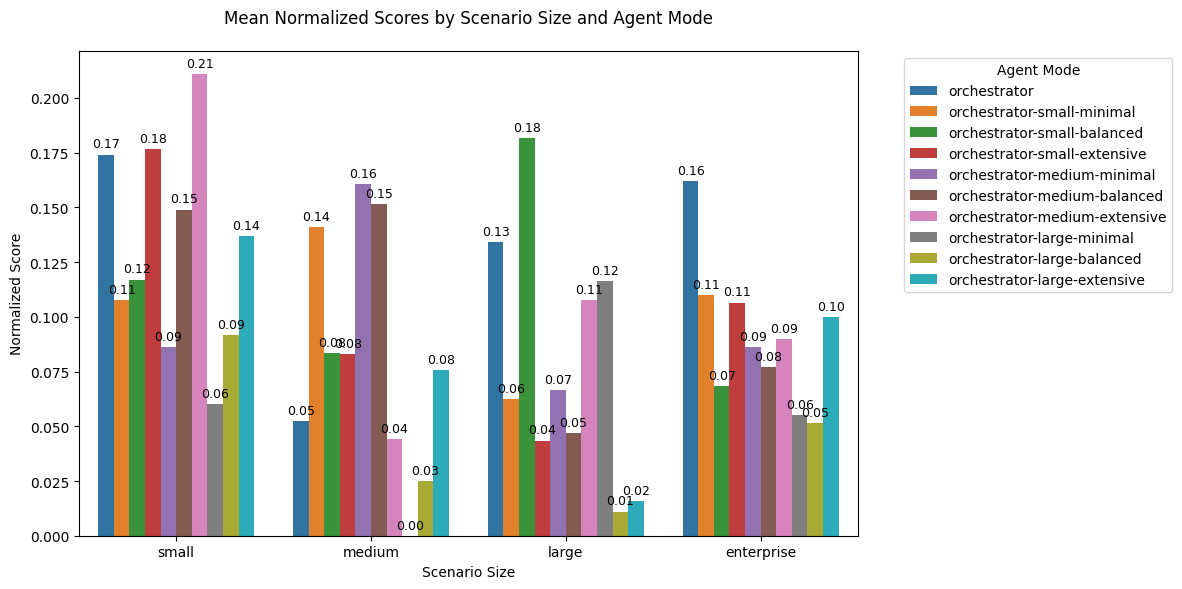

In [114]:

df = pd.read_csv("data/benchmark_results.csv")
print(f"Generated data for {len(df)} results")

# Create grouped bar plot by scenario size
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df, x='size', y='normalized_score', 
                hue='agent_mode', errorbar=None)

plt.title('Mean Normalized Scores by Scenario Size and Agent Mode', pad=20)
plt.xlabel('Scenario Size')
plt.ylabel('Normalized Score')
plt.xticks(rotation=0)
plt.legend(title='Agent Mode', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add value labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3, fontsize=9)

plt.tight_layout()
plt.show()


## Usage Metrics Visualizations

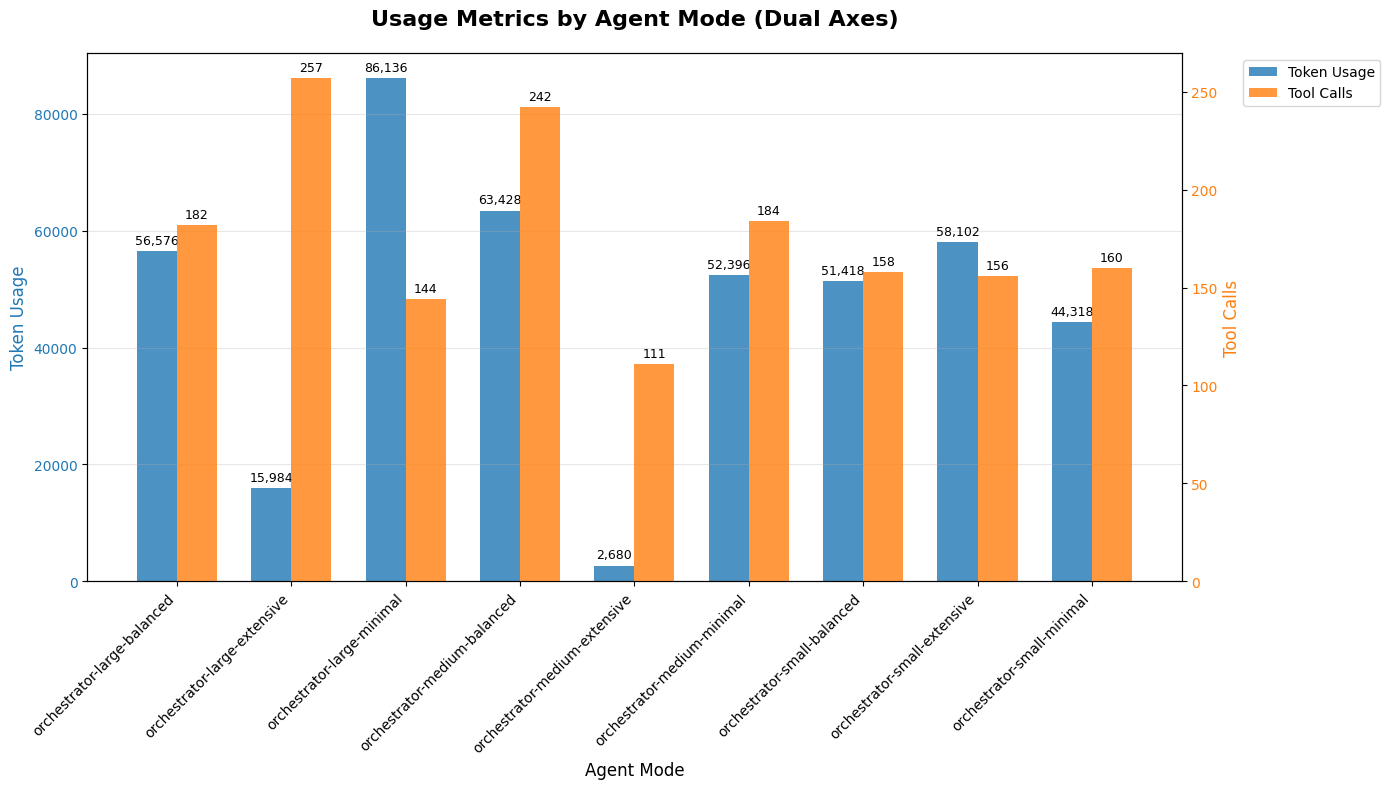

In [115]:
usage_df = pd.read_csv("data/usage_metrics.csv")

# Create dual-axis visualization
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot token usage on left y-axis
x_pos = range(len(usage_df))
width = 0.35

bars1 = ax1.bar([x - width/2 for x in x_pos], usage_df['tokens_used'], 
                width, label='Token Usage', color='C0', alpha=0.8)
ax1.set_xlabel('Agent Mode', fontsize=12)
ax1.set_ylabel('Token Usage', fontsize=12, color='C0')
ax1.tick_params(axis='y', labelcolor='C0')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(usage_df['agent_mode'], rotation=45, ha='right')

# Create second y-axis for tool calls
ax2 = ax1.twinx()
bars2 = ax2.bar([x + width/2 for x in x_pos], usage_df['tool_calls'], 
                width, label='Tool Calls', color='C1', alpha=0.8)
ax2.set_ylabel('Tool Calls', fontsize=12, color='C1')
ax2.tick_params(axis='y', labelcolor='C1')

# Add value labels on bars
for bar in bars1:
    height = bar.get_height()
    ax1.annotate(f'{height:,.0f}', xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=9)

for bar in bars2:
    height = bar.get_height()
    ax2.annotate(f'{height:.0f}', xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=9)

# Add title and legend
plt.title('Usage Metrics by Agent Mode (Dual Axes)', fontsize=16, fontweight='bold', pad=20)

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, bbox_to_anchor=(1.05, 1), loc='upper left')

# Add grids
ax1.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()



## Mean roles by scenario complexity (orchestrator only)

<Figure size 1400x800 with 0 Axes>

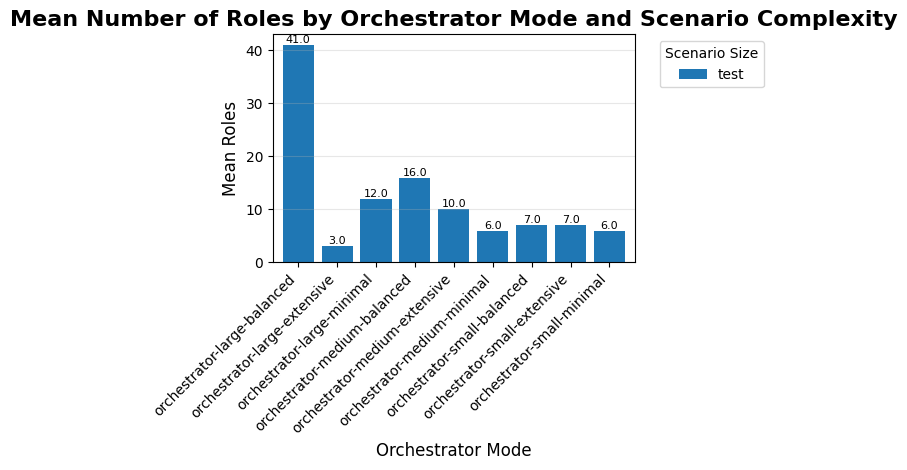

In [116]:
mean_roles_df = pd.read_csv("data/roles_bar_chart_data.csv", index_col=0)

plt.figure(figsize=(14, 8))
ax = mean_roles_df.plot(kind='bar', width=0.8)
plt.title("Mean Number of Roles by Orchestrator Mode and Scenario Complexity", fontsize=16, fontweight="bold")
plt.xlabel("Orchestrator Mode", fontsize=12)
plt.ylabel("Mean Roles", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis="y", alpha=0.3)
plt.legend(title="Scenario Size", bbox_to_anchor=(1.05, 1), loc='upper left')

# Add value labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f", label_type="edge", fontsize=8)

plt.tight_layout()
plt.show()